# Projet Numérique

Les équations de Lotka-Volterra, ou "modèle proie-prédateur", sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun.  Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante :
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1)
\end{matrix} \right.
$$
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

## Question 1
Donner une interprétation physique à chaque terme de la dynamique. 
Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x}\in \mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$. Que peut-on dire de leur stabilité à ce stade ?

#### Réponse 1


### Interprétation des différents coefficients:

Le coefficient $\alpha$ représente la capacité à se reproduire des proies. Il est homogène à l'inverse d'un temps. C'est le coefficient qui, multiplié par un temps et par un nombre de proies, donne le nombre de nouvelles proies arrivées suite à leur reproduction (à l'ordre 1).<br>
Le coefficient $\beta$ représente la capacité qu'ont les proies de mourir. Il est homogène à l'inverse d'un temps multiplié par l'inverse de la population de prédateurs. En effet, plus il y a de prédateurs, plus les proies meurent vite. C'est le coefficient qui, multiplié par un temps, un nombre de proies et un nombre de prédateurs, donne le nombre de proies mangées par les prétadeurs.<br>
Le coefficient $\gamma$ représente la capacité à se reproduire des prédateurs. Il est homogène à l'inverse d'un temps multiplié par l'inverse de la population de proies. En effet, plus il y a de proies, plus les prédateurs mangent bien et donc se reproduisent vite et en nombre. C'est le coefficient qui, multiplié par un temps, un nombre de proies et un nombre de prédateurs, donne le nombre de nouveaux prétadeurs arrivés suite à leur reproduction (à l'ordre 1).<br>
Le coefficient $\delta$ représente la capacité qu'ont les prédateurs de mourir. Il est homogène à l'inverse d'un temps. C'est le coefficient qui, multiplié par un temps et par un nombre de prétadeurs, donne le nombre de prédateurs décédés.  

### Recherche des points d'équilibre

On pose $x=(x_1,x_2)$, le système peut se réécrire: <br> $\dot{x}=f(x,t)$ <br> avec $f$, fonction de $\mathbb{R}_2{\times\mathbb{R}}$ vers $\mathbb{R}_2$ telle que $f(x_1,x_2)=\begin{pmatrix}
 x_1(\alpha -\beta x_2) \\
 -x_2(\gamma - \delta x_1)
\end{pmatrix}$ <br> Notons tout de suite que $f$ est $\mathcal{C}^1$, donc continûment différentiable par rapport à $x$. <br>
On cherche les points d'équilibre de $f$, donc $x$, tel que $f(x)=0$.
$(0,0)$ est une solution évidente. <br> Cherchons d'autres solutions en résolvant le système: 
$\left\{ \begin{matrix} x_1(\alpha -\beta x_2) &=0 \\ -x_2(\gamma - \delta x_1) &=0 \\ (x_1,x_2) &\neq (0,0)  \end{matrix} \right.$ <br>
Comme $\beta\neq0$ et $\delta\neq0$ (paramètres strictement positifs) on trouve alors comme solution : <br> $\bar{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ <br>
On a donc deux points d'équilibre : $(0,0)$ et $\bar{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$.

### Etude de la stabilité des points d'équilibre

Pour étudier la stabilité, on étudie le caractère Hurwitzien de la jacobienne de $f$. (On considère ici f définie dans $\mathbb{R}^2$  car f ne dépend pas du temps, on peut donc analyser ainsi la stabilité car on est dans le cas $f(x,t)=f(x)$)  <br> $J_{f}(x_1,x_2)= \begin{pmatrix} \alpha-\beta{x_2} & -\beta{x_1} \\ \delta{x_2} & \delta{x_1}-\gamma \end{pmatrix}$ <br> en $(0,0)$ on voit que la jacobienne a pour valeurs propres $\alpha$ et $-\gamma$, elle a une valeur propre a partie réelle strictement positive $\alpha$, donc $(0,0)$ est une solution instable. <br>
en $\bar{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$, la jacobienne vaut : <br> $J_{f}(\frac{\gamma}{\delta},\frac{\alpha}{\beta})= \begin{pmatrix} 0 & -\beta{\frac{\gamma}{\delta}} \\ \delta{\frac{\alpha}{\beta}} & 0 \end{pmatrix}$ <br> Son polynôme caractéristique vaut : $X^2+\alpha{\gamma}$, alors les valeurs propres sont imaginaires pures, donc à partie réelle nulle. On ne peut pas ainsi conclure sur la stabilité de $\bar{x}$. <br> On pourrait alors tenter une étude de stabilité par le théorème de Lyapunov mais le sujet reviendra dessus plus tard.


## Question 2
À l'aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le champ de vecteurs. 
Intuiter le comportement des solutions. 
On pourra aussi utiliser `streamplot` pour visualiser le portrait de phase.

#### Réponse 2

In [1]:
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt


In [2]:
def Q(f, xs, ys):
    X, Y = np.meshgrid(xs, ys)
    fx = np.vectorize(lambda x, y: f([x, y])[0])
    fy = np.vectorize(lambda x, y: f([x, y])[1])
    return X, Y, fx(X, Y), fy(X, Y)

In [3]:
a=1
b=1
c=1
d=1

In [4]:
def f(x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])

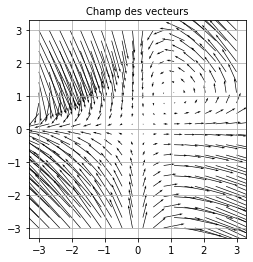

In [5]:
fig,axes=plt.subplots()
listeX = np.linspace(-3.0, 3.0, 20)
listeY = np.linspace(-3.0, 3.0, 20)
q=axes.quiver(*Q(f, listeX, listeY),units='xy',scale=5,color='k')
axes.set_aspect('equal')
plt.title('Champ des vecteurs',fontsize=10)
plt.grid(True)
plt.show()

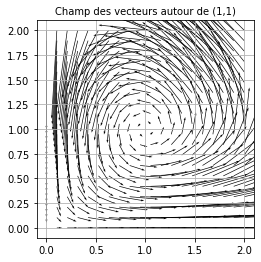

In [6]:
fig,axes=plt.subplots()
listeX = np.linspace(0, 2.0, 20)
listeY = np.linspace(0, 2.0, 20)
q=axes.quiver(*Q(f, listeX, listeY),units='xy',scale=2,color='k')
axes.set_aspect('equal')
plt.title('Champ des vecteurs autour de (1,1)',fontsize=10)
plt.grid(True)
plt.show()

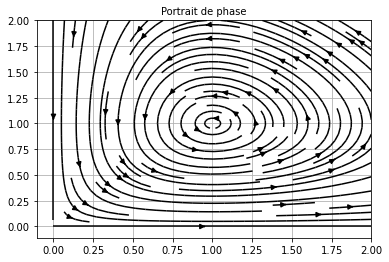

In [7]:
plt.figure()
plt.grid(True)
plt.title('Portrait de phase', fontsize = 10)
plt.streamplot(*Q(f, listeX, listeY), color="k") 

<br>

On observe les deux points fixes sur le portrait de phase :<br> on retrouve l'instabilité du point $(0,0)$ car les lignes de courant divergent proche de ce point. Cela est confirmé par l'aspect du champ de vecteur en $(0,0)$. <br> le point $\bar{x}$ ici en $(1,1)$ (car $\alpha=\beta=\gamma=\delta=1$) semble être stable, en effet les lignes de courant convergent proche de ce point. Et le champ de vecteur semble tourner autour.

De plus, $\bar{x}$ semble localement attractif, alors que le point $(0,0)$ semble répulsif.

## Question 3
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans  $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ reste dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ sur son ensemble de définition. 

#### Réponse 3

On considère $\mathbb{R}^2$ en tant qu'ouvert. On conserve $\mathbb{R}$ en temps qu'ouvert, qu'on notera $J$. <br> On rappelle que $f$, définie sur $\mathbb{R}\times{J}$ est continue et est continûment différentiable par rapport à $x$. 
D'après le théorème de Cauchy-Lipschitz, pour tout couple $(x_0,t_0)$ de $\mathbb{R}\times{J}$ il existe une unique solution maximale, notée $x$ au problème de Cauchy : <br> $\left\{ \begin{matrix} \dot{x} &= f(x,t) \\ x(t_0) &= x_0 \end{matrix} \right.$ <br> Soit $(x_0,t_0)$ dans ${\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}}\times{J}$, et $x$ la solution de l'équation différentielle tel que $x(t_0)=x_0$. Supposons par l'absurde que $x$ ne soit pas à valeur dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$. Il existe alors $t_1\in\mathbb{R}$ tel que :<br> - $x(t_1)=(a_1,0)$ ou <br> -$x(t_1)=(0,b_1)$<br>En effet, par continuité, si $x$ sort de $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ elle rencontre à un moment l'axe des abscisses ou des ordonnées.<br> Traitons le cas $x(t_1)=(a_1,0)$:<br>On sait que la fonction $x$ est solution du problème de Cauchy $\dot{x}=f(x,t)$ et $x(t_1)=(a_1,0)$. De plus, la continue-différentiabilité de $f$ par rapport à $x$ nous  donne l'unicité de cette solution. Or, la fonction $\tilde{x}$ définie par: $\tilde{x}(t)=(a_1\times{exp(\alpha(t-t_1))},0)$ est également solution au même programme de Cauchy. Et, en $t=t_0$, $\tilde{x}(t_0)\neq{x(t_0)}$. Ceci est donc absurde car on a deux fonctions distinctes solutions d'un même problème de Cauchy avec $f$ continûment différentiable.<br>On raisonne de même pour le cas $x(t_1)=(0,b_1)$.<br> Finalement, l'hypothèse $x$ sort de $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ est absurde.<br> Et donc, pour toute solution initialisée dans  $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$, elle reste dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ sur son ensemble de définition. 



Finalement, on sait que résoudre avec $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ comme ouvert au lieu de $\mathbb{R}^2$ revient au même tant que l'on initialise des solutions dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$. On peut donc se restreindre à $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ qu'on notera $X$ dans la suite de l'étude.

## Question 4
On considère la fonction
$$
H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2  
$$
définie sur $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$.
Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$ est définie sur $\mathbb{R}$.

#### Réponse 4

Pour $x$ une solution initialisée dans $X$, elle reste à valeur dans $X$ (question 3). On peut bien dériver $H$ le long de ces solutions. <br> $H'(x_1,x_2)(t)=x_1'(t)\times{\delta-\frac{\gamma\times{x_1'(t)}}{x_1(t)}} + x_2'(t)\times{\beta-\frac{\alpha\times{x_2'(t)}}{x_2(t)}}$ <br> $H'(x_1,x_2)(t)=x_1'(t)\times(\delta-\frac{\gamma}{x_1(t)}) + x_2'(t)\times(\beta-\frac{\alpha}{x_2(t)})$ <br> $H'(x_1,x_2)(t)={x_1(\alpha -\beta x_2)}\times(\delta-\frac{\gamma}{x_1(t)}) {-x_2(\gamma - \delta x_1)}\times(\beta-\frac{\alpha}{x_2(t)})$ <br> $H'(x_1,x_2)(t)=0$

La fonction H est donc constante au cours du temps.<br> On rappelle le théorème sur le domaine maximal d'existence des solutions. Pour $J$ ouvert de $\mathbb{R}$, $X$ ouvert de $\mathbb{R}^n$, $f$ continue et définie sur $J\times{X}$ : les solutions maximales de l'équation différentielles sont définies sur un ouvert. Celui-ci est fini en ses bords soit si la solution $x$ a sa norme qui tend vers l'infini en ce bord, soit si la distance de $(t,x(t))$ à $J\times{X}$ tend vers $0$ en ce bord. 

On applique ce théorème avec nos ensembles $J$ ($\mathbb{R}$) et $X$ ($\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$). On considère pour $(t_0,x_0)$ de $J\times{X}$ une solution maximale de l'équation. Montrons à présent que cette solution est définie sur $J$ entier. <br> Par l'absurde supposons qu'une solution maximale ne soit pas définie sur $J$ entier. Alors d'après le théorème sur la domaine maximal d'existence des solutions : <br> -soit $x$ tend en norme vers l'infini au bord. Supposons cela, quand $t$ tend vers le bord, $\|x(t)\|$ tend vers l'infini, cela implique que $\|H(x(t))\|\to\propto$, ce qui est contredit par le fait que $H$ ne dépend pas de $t$. <br> -soit la distance de $(t,x(t))$ à $J\times{X}$ tend vers $0$. En particulier, au moins une des coordonnées de $x$ tend vers $0$. Alors $H(x(t))$ tend vers $-\propto$ ce qui contredit également le fait que H(x(t)) soit constant. <br> En définitive, la solution maximale ne peut être définie sur un intervalle fini. Elle est donc définie sur $J$ entier.

Donc, toute solution maximale initialisée dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$ est définie sur $\mathbb{R}$.

## Question 5
Représenter les courbes de niveau de $H$. Où se trouve $\bar{x}$? Qu'en conclue-t-on sur le comportement des solutions ? En déduire graphiquement que $\bar{x}$ est stable, au sens de la définition de la stabilité.

#### Réponse 5

In [8]:
def H(x1,x2):
    return d*x1 - c*np.log(x1) + b*x2 - a*np.log(x2)

In [9]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

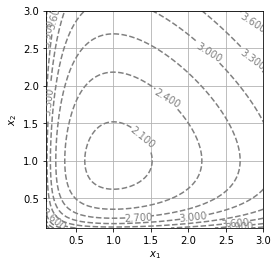

In [10]:
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)

On observe que $\bar{x}$ est un miminum local de la fonction $H$. D'autres parts toutes les lignes de niveau de H forment une boucle autour de $\bar{x}$. <br> On sait que $H(x(t))=H(x(t_0))=cte$. ALors pour toute solution maximale de l'équation, on reste sur une courbe de niveau de $H$.<br> Montrons que $\bar{x}$ est stable. Soit $\epsilon>0$ (suffisemment petit pour que le cercle de rayon $\epsilon$ et de centre $\bar{x}$ ne coupe ni l'axe des abscisses ni celui des ordonnées) <br> On trace un cercle de rayon $\epsilon$ autour de $\bar{x}$, on considère alors la ligne de niveau de plus grande valeur passant dans le cercle. On fixe alors $\eta>0$ tel que le cercle de centre $\bar{x}$ et de rayon $\eta$ englobe toute cette courbe de niveau. Un tel $\eta$ existe car toutes les lignes de niveau de $H$ sont fermés. <br> Pour cette $\eta$ on a bien toutes les solutions initialisées à $\epsilon$ proche de $\bar{x}$ qui reste à une distance $\eta$ proche de $\bar{x}$ car elle reste sur une même courbe de niveau et ne peuvent pas sortir du cercle de rayon $\eta$ autour de $\bar{x}$. 

## Question 6
Coder une fonction du type :

prenant en entrée une fonction $f:\mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l'ordre de convergence ?

#### Réponse 6

In [11]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    t=[t0]
    x=[x0]
    N=int((tf-t0)/dt) #le nombre de temps auxquels on veut prendre les valeurs
    
    for i in range(N-1): 
        x.append(x[-1]+dt*f(t[-1],x[-1]))
        t.append(t[-1]+dt)
    #on rajoute un dernier point en tf
    ecart=tf-t[-1]
    x.append(x[-1]+ecart*f(t[-1],x[-1]))
    t.append(tf)
    
    return np.array(t),np.array(x)

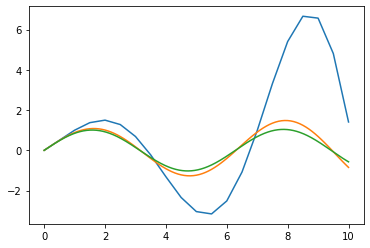

In [12]:
#on teste euler_explicite sur un oscillateur de type x''+x=0
def l(t,x):
    x1,x2=x[0],x[1]
    return np.array([x2,-x1])
for dt in [0.5,0.1,0.01]:
    nT,nX=solve_euler_explicit(l,np.array([0,1]),dt,0,10)
    plt.plot(nT,nX[:,0])



On observe bien la convergence lorsque $dt$ tend vers $0$. <br> Pour visualiser l'ordre de convergence, on trace $\frac{\max_{0<=i<=N} \|x^{i}-x(t_i)\|}{{dt}^p}$ pour différentes valeurs de $dt$  et on regarde pour quelles valeurs de $p$ ce quotient est borné ou non, l'odre de convergence étant la plus grande valeur à partir duquel le quotient est borné.

## Question 7
Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra.
Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ?
On pourra tracer l'évolution de la fonction $H$.

#### Réponse 7

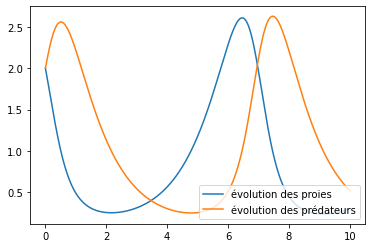

In [13]:
#a=b=c=d=1, populations initiales=(2,2), temps=10
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit(f,np.array([2,2]),0.01,0,10)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

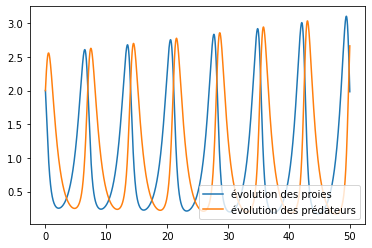

In [14]:
#a=b=c=d=1, populations initiales=(2,2), temps=50
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

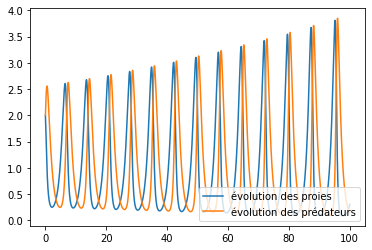

In [15]:
#a=b=c=d=1, populations initiales=(2,2), temps=100
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit(f,np.array([2,2]),0.01,0,100)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

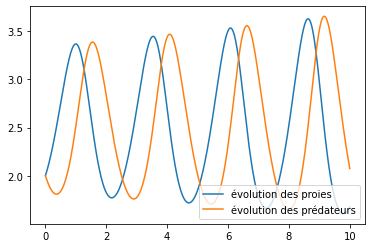

In [16]:
#a=2.5 b=1 c=2.5 d=1, populations initiales=(2,2), temps=10
a=2.5
b=1
c=2.5
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit(f,np.array([2,2]),0.01,0,10)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

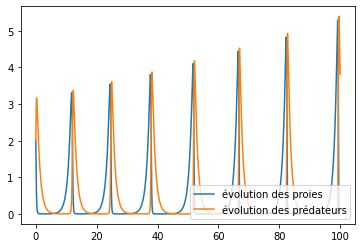

In [17]:
#a=1 b=1.5 c=1 d=2.5, populations initiales=(2,2), temps=100
a=1
b=2.5
c=1
d=2.5
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit(f,np.array([2,2]),0.01,0,100)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

On observe à chaque fois le même type de phénomène : une oscillation quasi-péridoique des populations mais qui augmente en amplitude en cours du temps, le système diverge au temps long ce qui est anormal, observons à présent l'évolution de $H$.

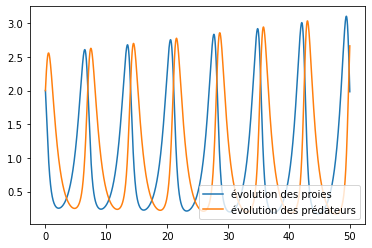

In [18]:
#a=b=c=d=1, populations initiales=(2,2), temps=50
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

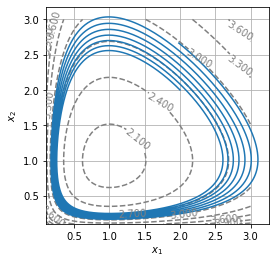

In [19]:
Hx1=[]
Hx2=[]
for i in range(len(nX)):
    Hx1.append(nX[i][0])
    Hx2.append(nX[i][1])
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.plot(Hx1,Hx2)

On observe que les point $(x_1(t),x_2(t))$ ne suivent pas une ligne de niveau de la fonction $H$ comme ils devraient le faire ($H(x(t))$ constant), au contraire la solution diverge.

## Question 8
Coder maintenant une fonction du type :

donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x}=f(t,x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

On propose maintenant de modifier ces schémas de façon à stabiliser $H$ et assurer sa conservation le long des solutions numériques.

#### Réponse 8

In [20]:
eps=10e-4
def norme(x):
    d=x.shape[0]
    s=0
    for i in range(d):
        s+=x[i]**2
    return np.sqrt(s)
def recherche_point_fixe(F,eps,x0,itermax):
    formerx=x0
    newx=F(x0)
    for k in range(itermax):
        if norme(newx-formerx)/norme(x0) <eps:
            return newx
        formerx=newx
        newx=F(formerx)
    return f"no convergence in {itermax} steps"
                
def solve_euler_implicit(f, x0, dt, t0, tf,itermax=100):
    t=[t0]
    x=[x0]
    N=int((tf-t0)/dt)
    for i in range(N-1):
        t.append(t[-1]+dt)
        def F(y):
            return x[-1]+dt*f(t[-1],y)
        newx=recherche_point_fixe(F,eps,x[-1]+dt*f(t[-2],x[-1]),itermax)
        x.append(newx)
    return np.array(t),np.array(x)

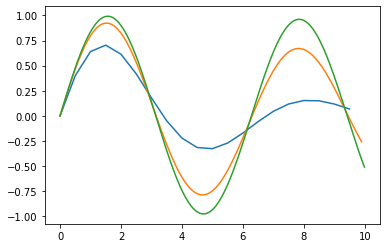

In [21]:
#on teste euler_implicit sur un oscillateur de type x''+x=0
def l(t,x):
    x1,x2=x[0],x[1]
    return np.array([x2,-x1])
for dt in [0.5,0.1,0.01]:
    nT,nX=solve_euler_implicit(l,np.array([0,1]),dt,0,10)
    plt.plot(nT,nX[:,0])


Comme pour Euler explicit, on observe que la fonction converge d'autant mieux que dt est petit. Mais pour un même dt, Euler implicite est plus proche de la vraie réponse que Euler explicite. <br> Utilisons à présent Euler implicite sur les équations de Volta.

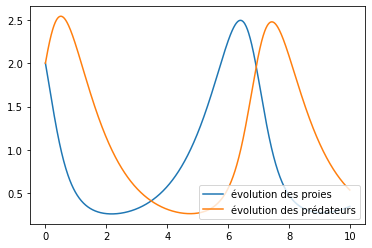

In [22]:
#a=b=c=d=1, populations initiales=(2,2), temps=10
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_implicit(f,np.array([2,2]),0.01,0,10)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

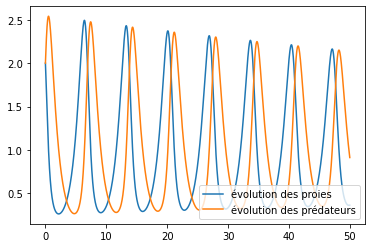

In [23]:
#a=b=c=d=1, populations initiales=(2,2), temps=50
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_implicit(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

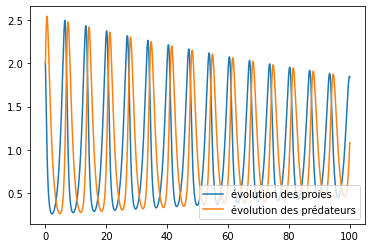

In [24]:
#a=b=c=d=1, populations initiales=(2,2), temps=100
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_implicit(f,np.array([2,2]),0.01,0,100)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

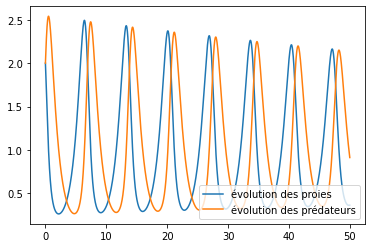

In [25]:
#a=b=c=d=1, populations initiales=(2,2), temps=50
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_implicit(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')

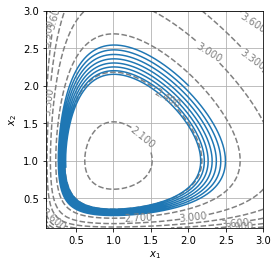

In [26]:
Hx1=[]
Hx2=[]
for i in range(len(nX)):
    Hx1.append(nX[i][0])
    Hx2.append(nX[i][1])
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.plot(Hx1,Hx2)

On observe cette fois un phénomène contraire à Euler explcite. Au lieu de gagner en amplitude au cours du temps, les courbes perdent en amplitude. Au lieu d'aller sur une ligne de niveau de plus en plus grande, la fonction H (qui est en réalité constante) prends des valeurs de plus en plus petites.

## Question 9
Expliquer pourquoi les solutions de
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
\end{matrix} \right.
$$

sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$ continûment différentiable.

#### Réponse 9

Notons ce nouveau système $(E)$. On suppose $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$ continûment différentiable. Montrons que les solutions de Lokta-Volterra et $(E)$ sont identiques. <br>
Pour $x$ solution des équations de Lokta. On sait d'une part que $x$ est définie sur $\mathbb{R}$, que $H(x)(t)$ est constante et donc en particulier égale à $H_0$. Le deuxième terme de chaque équation du système s'annule donc,et $x$ est bien solution du système $(E)$. Et ce, pour n'importe quel fonction $u$.<br> Réciproquement, considérons $x$ solution du système $(E)$, montrons qu'elle est également solution du système de Lokta-Volterra.<br> On prend la fonction $x_2$, la solution au problème de Cauchy de l'équation de Lokta-Volterra avec les valeurs en $(t=0)$ de $x$. On vient de voir qu'elle est également solution de $(E)$. Or, le système $(E)$ est de la forme $\dot{x}=f(x,t)$ avec $f$ continûment différentiable par rapport à $x$. Donc solution unique au problème de Cauchy. Alors $x=x_2$, donc $x$ est solution de Lokta-Volterra.

## Question 10
Soit $H_0\in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que
$$
\frac{d }{dt} (H(x(t))-H_0) = -k \| \nabla H(x(t)) \|^2 (H(x(t))-H_0) \ .
$$ 
En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

#### Réponse 10

<br>Calculons la dérivée de $H-H_0$; on suppose au passage que pour $x$ solution du système $(E)$, $x$ reste à valeur dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$. C'est bien le cas si $H_0=H(x)(0)$ comme les solutions du système $(E)$ et des équations de Lokta-Volterra sont alors identiques.
Dérivons :<br> $\frac{d }{dt} (H(x(t))-H_0) =x_1'(t)\times{\delta-\frac{\gamma\times{x_1'(t)}}{x_1(t)}} + x_2'(t)\times{\beta-\frac{\alpha\times{x_2'(t)}}{x_2(t)}}$
<br>$\frac{d }{dt} (H(x(t))-H_0) =x_1'(t)\times(\delta-\frac{\gamma}{x_1(t)}) + x_2'(t)\times(\beta-\frac{\alpha}{x_2(t)})$
<br>$\frac{d }{dt} (H(x(t))-H_0) =(x_1(\alpha -\beta x_2) - u_1(x_1,x_2)(t) (H(x_1,x_2)(t)-H_0))\times(\delta-\frac{\gamma}{x_1(t)})+(-x_2(\gamma - \delta x_1) - u_2(x_1,x_2)(t) (H(x_1,x_2)(t)-H_0))\times(\beta-\frac{\alpha}{x_2(t)})$
<br>$\frac{d }{dt} (H(x(t))-H_0) =(x_1\alpha -\beta x_2 x_1- u_1(x_1,x_2)(t) H(x_1,x_2)(t)+ u_1(x_1,x_2)(t)H_0))\times(\delta-\frac{\gamma}{x_1(t)})+(-x_2\gamma + \delta x_1 x_2 - u_2(x_1,x_2)(t) H(x_1,x_2)(t)+ H_0 u_2(x_1,x_2)(t))\times(\beta-\frac{\alpha}{x_2(t)})$
<br>$\frac{d }{dt} (H(x(t))-H_0) =x_1\alpha\delta -\beta\delta x_2 x_1- u_1(x_1,x_2)(t) H(x_1,x_2)(t) \delta+ u_1(x_1,x_2)(t)H_0\delta -\alpha\gamma +\beta\gamma x_2+\frac{1}{x_1}\times(u_1(x_1,x_2)(t) H(x_1,x_2)(t) \gamma- u_1(x_1,x_2)(t)H_0\gamma)-x_2\gamma\beta + \delta \beta x_1 x_2 - u_2(x_1,x_2)(t) H(x_1,x_2)(t)\beta+H_0 u_2(x_1,x_2)(t)\beta +\gamma\alpha -\alpha\delta x_1+\frac{1}{x_2(t)}(+\alpha u_2(x_1,x_2)(t) H(x_1,x_2)(t)-\alpha H_0 u_2(x_1,x_2)(t))$
<br>$\frac{d }{dt} (H(x(t))-H_0) =- u_1(x_1,x_2)(t) H(x_1,x_2)(t) \delta+ u_1(x_1,x_2)(t)H_0\delta +\frac{1}{x_1}\times(u_1(x_1,x_2)(t) H(x_1,x_2)(t) \gamma- u_1(x_1,x_2)(t)H_0\gamma)- u_2(x_1,x_2)(t) H(x_1,x_2)(t)\beta+H_0 u_2(x_1,x_2)(t)\beta +\frac{1}{x_2(t)}(\alpha u_2(x_1,x_2)(t) H(x_1,x_2)(t)-\alpha H_0 u_2(x_1,x_2)(t))$
<br>$\frac{d }{dt} (H(x(t))-H_0) =(H(x_1,x_2)(t)-H_0) (u_1(x_1,x_2)(t)\times(-\delta+\frac{\gamma}{x_1(t)})-u_2(x_1,x_2)(t)\times(\beta-\frac{\alpha}{x_2(t)}))$


Or, le gradient de $H$ vaut :$\nabla H(x(t))=(\delta-\frac{\gamma}{x_1(t)},\beta-\frac{\alpha}{x_2(t)})$

D'où :$\frac{d }{dt} (H(x(t))-H_0) =-(H(x_1,x_2)(t)-H_0) (u_1(x_1,x_2)(t)\times(\delta-\frac{\gamma}{x_1(t)})+u_2(x_1,x_2)(t)\times(\beta-\frac{\alpha}{x_2(t)}))$<br>$\frac{d }{dt} (H(x(t))-H_0) =-(H(x_1,x_2)(t)-H_0) (u(x_1,x_2)(t)|\nabla{H(t)})$


Donc, il faut $u(x_1,x_2)$ colinéaire au gradient de $H$, soit $u(x_1,x_2)=k\nabla{H(t)}$ pour avoir<br>$
\frac{d }{dt} (H(x(t))-H_0) = -k \| \nabla H(x(t)) \|^2 (H(x(t))-H_0) \ .
$<br> Un tel $u$ est bien continûment différentiable. Du moins si l'on restreint l'étude à $x$ dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$.

On suppose à présent que $x$ reste à une distance strictement positive de $\bar{x}$, c'est à dire, qu'il existe $d>0$ tel que pour tout $t$ de $\mathbb{R}$, $\|x(t)-\bar{x}\| \geqslant{d}$. On sait que le gradient de $H$ s'annule uniquement en $\bar{x}$. Donc, en restant loin de ce point, on a $\|\nabla{H(x(t))}\|\geqslant{c}$ avec $c>0$. <br>Alors, $\frac{d }{dt} (H(x(t))-H_0)\leqslant -kc^2 (H(x(t))-H_0)$ <br> D'après le lemme de Grönwall :$$ \forall{t>0},(H(x(t))-H_0)\leqslant(H(x(0))-H_0)\times exp(\int_{0}^t -kc^2\, \mathrm{d}s)$$

donc,$ \forall{t>0},(H(x(t))-H_0)\leqslant(H(x(0))-H_0)\times exp(-tkc^2)$<br> D'où, $H(x(t))$ tend vers $H_0$ quand $t$ tend vers l'infini.

## Question 11
En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ?

$k$ sert à contrôler la vitesse à laquelle $H$ converge vers $H_0$. Plus $k$ est grand, plus l'implémentation converge vite. Cependant, on  verra plus tard qu'on ne peut pas prendre $k$ trop important.

In [27]:
###correction des fonctions d'Euler
def gradH(x1,x2) :
    return np.array([d - c/x1, b - a/x2])
k=10

def solve_euler_explicit_corrige(f,x0,dt,t0,tf):
    H0=H(x0[0],x0[1])
    def newf(t,x):
        resf=f(t,x)
        f1,f2=resf[0],resf[1]
        resg=-k*(H(x[0],x[1])-H0)*gradH(x[0],x[1])
        g1,g2=resg[0],resg[1]
        return np.array([f1+g1,f2+g2])
    return solve_euler_explicit(newf,x0,dt,t0,tf)

def solve_euler_implicit_corrige(f,x0,dt,t0,tf):
    H0=H(x0[0],x0[1])
    def newf(t,x):
        resf=f(t,x)
        f1,f2=resf[0],resf[1]
        resg=-k*(H(x[0],x[1])-H0)*gradH(x[0],x[1])
        g1,g2=resg[0],resg[1]
        return np.array([f1+g1,f2+g2])
    return solve_euler_implicit(newf,x0,dt,t0,tf)   

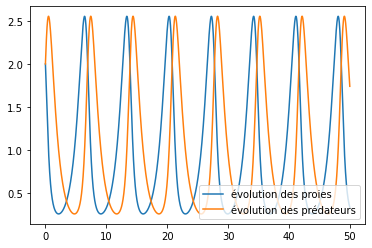

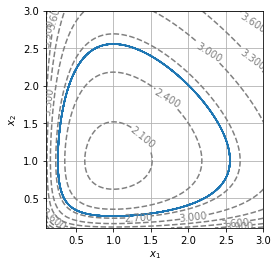

In [34]:
#a=b=c=d=1, populations initiales=(2,2), temps=50
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit_corrige(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')
Hx1=[]
Hx2=[]
for i in range(len(nX)):
    Hx1.append(nX[i][0])
    Hx2.append(nX[i][1])
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.plot(Hx1,Hx2)

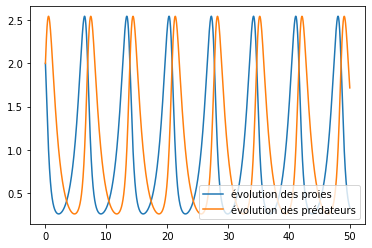

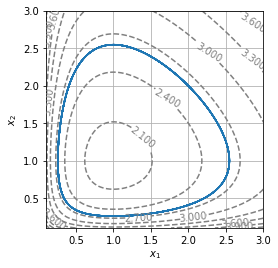

In [35]:
#a=b=c=d=1, populations initiales=(2,2), temps=50
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_implicit_corrige(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')
Hx1=[]
Hx2=[]
for i in range(len(nX)):
    Hx1.append(nX[i][0])
    Hx2.append(nX[i][1])
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.plot(Hx1,Hx2)

On observe que cette fois, $H$ reste constante et la solution $x$ est mieux approximée.

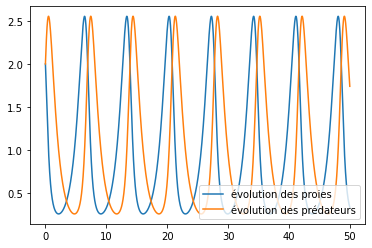

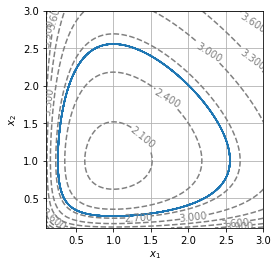

In [36]:
#influence de k
k=10
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit_corrige(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')
Hx1=[]
Hx2=[]
for i in range(len(nX)):
    Hx1.append(nX[i][0])
    Hx2.append(nX[i][1])
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.plot(Hx1,Hx2)

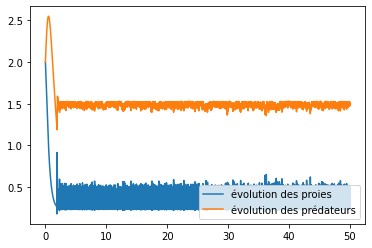

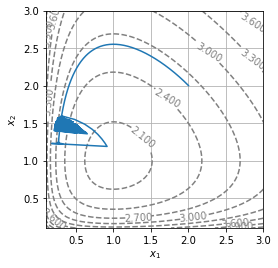

In [37]:
#influence de k
k=50
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit_corrige(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')
Hx1=[]
Hx2=[]
for i in range(len(nX)):
    Hx1.append(nX[i][0])
    Hx2.append(nX[i][1])
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.plot(Hx1,Hx2)

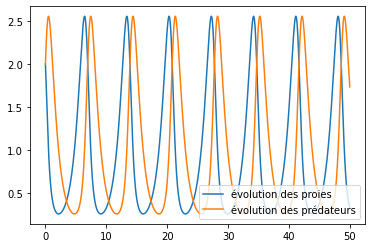

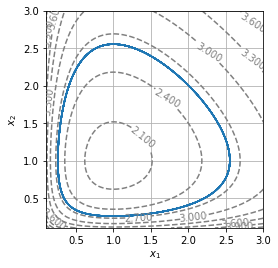

In [38]:
#influence de k
k=20
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit_corrige(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')
Hx1=[]
Hx2=[]
for i in range(len(nX)):
    Hx1.append(nX[i][0])
    Hx2.append(nX[i][1])
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.plot(Hx1,Hx2)

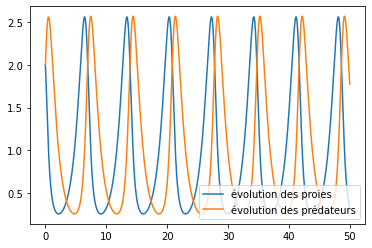

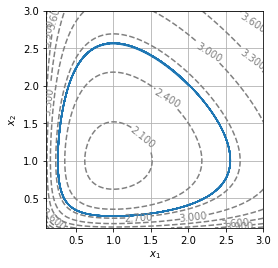

In [39]:
#influence de k
k=2
a=1
b=1
c=1
d=1
def f(t,x):
    x1,x2=x[0],x[1]
    d1=x1*(a-b*x2)
    d2=-x2*(c-d*x1)
    return np.array([d1,d2])
nT,nX=solve_euler_explicit_corrige(f,np.array([2,2]),0.01,0,50)
plt.plot(nT,nX[:,0],label='évolution des proies')
plt.plot(nT,nX[:,1],label='évolution des prédateurs')
plt.legend(loc='lower right')
Hx1=[]
Hx2=[]
for i in range(len(nX)):
    Hx1.append(nX[i][0])
    Hx2.append(nX[i][1])
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 3.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.plot(Hx1,Hx2)

On en conclue alors que pour $k$ trop grand, la résolution de l'équation différentielle ne fonctionne plus. On fixe donc $k=20$.